# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

final_cities = list()
lat = list()
lng = list()
temp_max = list()
humidity = list()
cloudiness = list()
wind_speed = list()
country = list()
date = list()

print("Beginning Data Retrieval")
print("-----------------------------------")

counter = 0
set_counter = 1

for city in cities:
    response = requests.get(query_url + city).json()

    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        final_cities.append(city)
        counter += 1
        print(f"Processing Record {counter} of Set {set_counter} | {city}")

        if counter == 50:
            set_counter = set_counter+1
            counter = 0

    except KeyError:
        print("City not found. Skipping...")

print("-----------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------")

Beginning Data Retrieval
-----------------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | pekan nenas
City not found. Skipping...
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | sile
Processing Record 6 of Set 1 | hanstholm
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | necochea
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | aklavik
Processing Record 12 of Set 1 | ostrovnoy
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | san cristobal
Processing Record 15 of Set 1 | aswan
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | kapaa
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | bulgan
City not found. Skipping...
Processing Record 20 of Set 1 | kottayam
Processing R

Processing Record 35 of Set 4 | comodoro rivadavia
Processing Record 36 of Set 4 | brigantine
City not found. Skipping...
Processing Record 37 of Set 4 | poum
Processing Record 38 of Set 4 | martapura
Processing Record 39 of Set 4 | nome
Processing Record 40 of Set 4 | chake chake
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | nadym
Processing Record 43 of Set 4 | hayden
City not found. Skipping...
Processing Record 44 of Set 4 | akdepe
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | faya
Processing Record 47 of Set 4 | huarmey
Processing Record 48 of Set 4 | oranjemund
Processing Record 49 of Set 4 | dong hoi
Processing Record 50 of Set 4 | kashi
Processing Record 1 of Set 5 | atar
Processing Record 2 of Set 5 | anadyr
Processing Record 3 of Set 5 | luganville
Processing Record 4 of Set 5 | kamaishi
Processing Record 5 of Set 5 | kathu
Processing Record 6 of Set 5 | altamont
Processing Record 7 of Set 5 | piacabucu
Processing Record 8 o

Processing Record 28 of Set 8 | nakhon phanom
Processing Record 29 of Set 8 | saint-joseph
Processing Record 30 of Set 8 | panzhihua
Processing Record 31 of Set 8 | manavalakurichi
Processing Record 32 of Set 8 | margate
Processing Record 33 of Set 8 | vestmannaeyjar
Processing Record 34 of Set 8 | artyom
Processing Record 35 of Set 8 | whitehorse
Processing Record 36 of Set 8 | sanford
Processing Record 37 of Set 8 | port hueneme
Processing Record 38 of Set 8 | guerrero negro
Processing Record 39 of Set 8 | oktyabrskoye
Processing Record 40 of Set 8 | suzhou
Processing Record 41 of Set 8 | kintinku
Processing Record 42 of Set 8 | gizo
Processing Record 43 of Set 8 | tall kayf
Processing Record 44 of Set 8 | kaspiysk
Processing Record 45 of Set 8 | naila
Processing Record 46 of Set 8 | tallahassee
Processing Record 47 of Set 8 | lugovoy
Processing Record 48 of Set 8 | college
Processing Record 49 of Set 8 | plouzane
Processing Record 50 of Set 8 | nikolayevka
Processing Record 1 of Set

Processing Record 15 of Set 12 | westport
Processing Record 16 of Set 12 | maniitsoq
Processing Record 17 of Set 12 | mahon
Processing Record 18 of Set 12 | lysyye gory
Processing Record 19 of Set 12 | porto velho
Processing Record 20 of Set 12 | zalantun
-----------------------------------
Data Retrieval Complete
-----------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame({
    "City": final_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temperature (F)": temp_max,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date
})
df.head()

,City,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,rikitea,-23.12,-134.97,69.57,68,0,21.92,PF,1593656666
1,cape town,-33.93,18.42,53.01,100,33,3.36,ZA,1593656425
2,pekan nenas,1.51,103.51,84.20,79,20,4.70,MY,1593657237
3,east london,-33.02,27.91,63.52,32,52,5.10,ZA,1593656650
4,sile,41.18,29.61,72.00,82,0,8.30,TR,1593657239


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 570 non-null    object 
 1   Lat                  570 non-null    float64
 2   Lng                  570 non-null    float64
 3   Max Temperature (F)  570 non-null    float64
 4   Humidity (%)         570 non-null    int64  
 5   Cloudiness (%)       570 non-null    int64  
 6   Wind Speed (mph)     570 non-null    float64
 7   Country              570 non-null    object 
 8   Date                 570 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.2+ KB


In [6]:
df.to_csv(output_data_file, index=True, index_label="City_ID")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
df.describe()

,Lat,Lng,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,5.700000e+02
mean,20.916684,18.228772,68.472474,71.503509,48.473684,7.566667,1.593657e+09
std,32.548328,90.947151,13.931547,21.095502,38.089666,5.116679,2.639841e+02
min,-54.800000,-179.170000,26.600000,9.000000,0.000000,0.160000,1.593656e+09
25%,-3.712500,-64.575000,58.285000,60.000000,6.250000,3.600000,1.593657e+09
50%,24.635000,23.430000,70.375000,77.000000,40.000000,6.420000,1.593657e+09
75%,48.287500,100.300000,80.010000,87.000000,90.000000,10.290000,1.593657e+09
max,78.220000,179.320000,101.210000,100.000000,100.000000,31.090000,1.593658e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
def scatter_plot(df, x, y):
    plt.scatter(df[x], df[y], facecolors="dodgerblue",
                edgecolors="black", alpha=0.4)
    analysis_date = time.strftime("%x")
    plt.title(f"City Latitude vs {y} ({analysis_date})")
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.grid()
    plt.savefig(f"output_data/{x}vs{y}.png")
    plt.show()

## Latitude vs. Temperature Plot

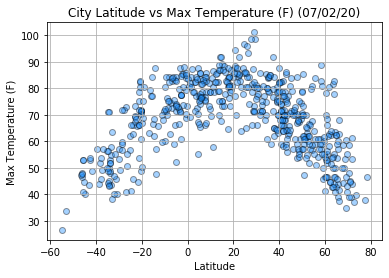

In [9]:
scatter_plot(df, "Lat", "Max Temperature (F)")

## Latitude vs. Humidity Plot

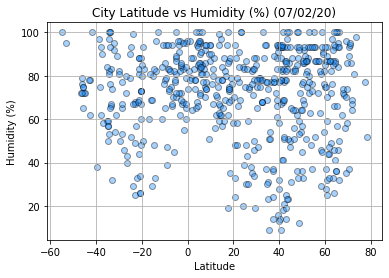

In [10]:
scatter_plot(df, "Lat", "Humidity (%)")

## Latitude vs. Cloudiness Plot

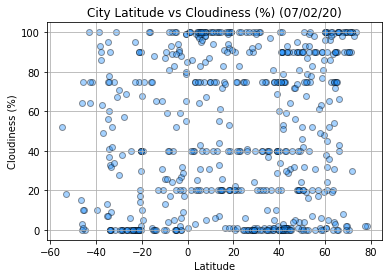

In [11]:
scatter_plot(df, "Lat", "Cloudiness (%)")

## Latitude vs. Wind Speed Plot

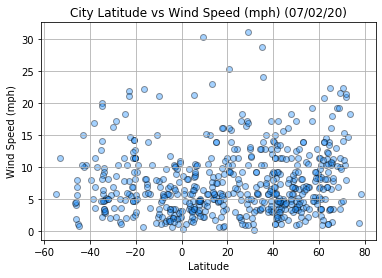

In [12]:
scatter_plot(df, "Lat", "Wind Speed (mph)")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot(df_name, df, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x], df[y])
    regress_values = slope * df[x] + intercept

    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    print(f"The correlation coefficient is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")

    plt.scatter(df[x], df[y], facecolors="grey", alpha=0.5)
    plt.plot(df[x], regress_values, "b--", linewidth=1)
    plt.annotate(line_eq, (df[x].min(), df[y].quantile(
        0.25)), fontsize=15, color="blue")
    plt.title(f"{df_name} Hemisphere - {y} vs Latitude")
    plt.xlabel("Latitude")
    plt.ylabel(y)
    plt.savefig(f"output_data/Fig{df_name}_{x}vs{y}.png")
    plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] >= 0]
southern_df = df[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: -0.6986315794535776
The r-squared is: 0.48808608380980045


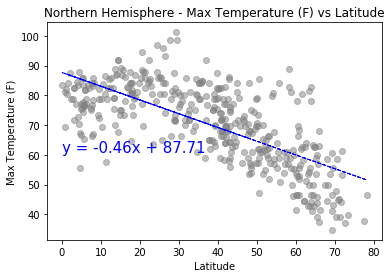

In [15]:
linear_regression_plot("Northern", northern_df,
                       x="Lat", y="Max Temperature (F)")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.7728612442135742
The r-squared is: 0.5973145028073539


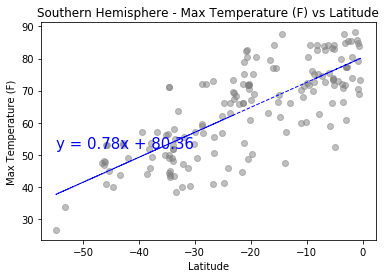

In [16]:
linear_regression_plot("Southern", southern_df,
                       x="Lat", y="Max Temperature (F)")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.1050750459152605
The r-squared is: 0.011040765274094103


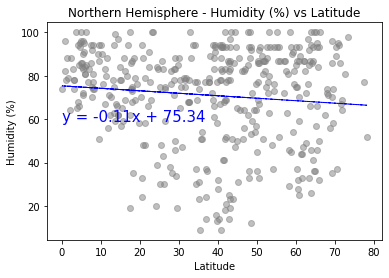

In [17]:
linear_regression_plot("Northern", northern_df, x="Lat", y="Humidity (%)")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.06693722240355644
The r-squared is: 0.004480591743103179


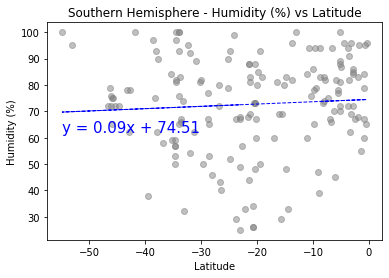

In [18]:
linear_regression_plot("Southern", southern_df, x="Lat", y="Humidity (%)")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: -0.0411091925956932
The r-squared is: 0.0016899657158697965


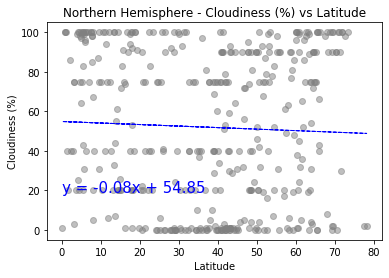

In [19]:
linear_regression_plot("Northern", northern_df, x="Lat", y="Cloudiness (%)")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is: 0.08097813399221883
The r-squared is: 0.006557458184861747


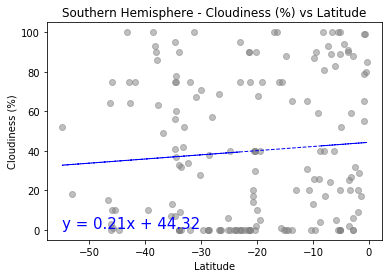

In [20]:
linear_regression_plot("Southern", southern_df, x="Lat", y="Cloudiness (%)")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: 0.1567291704332064
The r-squared is: 0.024564032864681055


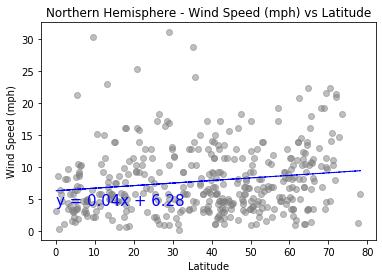

In [21]:
linear_regression_plot("Northern", northern_df, x="Lat", y="Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is: -0.15636349276073566
The r-squared is: 0.024449541868336633


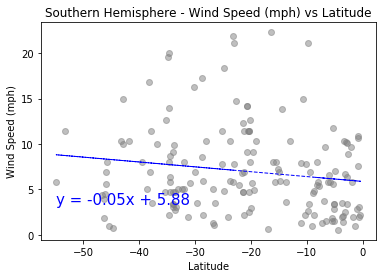

In [22]:
linear_regression_plot("Southern", southern_df, x="Lat", y="Wind Speed (mph)")